## P4DS: Assignment 3 (Autumn 2020)

# Data Analysis Project

#### Notebook template design: Brandon Bennett (2020/11/3)

# _Analysis of Rainfall in India_


### Project participants:

* A. Amal Bose (mm20a2b@leeds.ac.uk)
* B. Shrey Jaiswal (mm20sj2@leeds.ac.uk)


# Project Plan

## The Data (10 marks)

The dataset consists of Sub-division wise monthly data of Rainfall in India for 115 years from 1901-2015. It contains the rainfall records for 36 meteorological sub-divisions of India. This dataset is downloaded from [Kaggle](https://www.kaggle.com/rajanand/rainfall-in-india/version/2?select=rainfall+in+india+1901-2015.csv). This [dataset](https://data.gov.in/catalog/rainfall-india?filters%5Bfield_catalog_reference%5D=1090541&format=json&offset=0&limit=6&sort%5Bcreated%5D=desc) was published by [India Meteorological Department(IMD) Govt. of India](https://mausam.imd.gov.in/) under [Govt. Open Data License - India](https://data.gov.in/government-open-data-license-india). This data set contains two _csv_ files.

* district wise rainfall normal.csv
* rainfall in india 1901-2015.csv

Here in our project, we will use **rainfall in india 1901-2015.csv** because this dataset provides statewise data.

### Column Description

* **SUBDIVISION** : Names of meteorological sub-divisions of India
* **YEAR** : Year of the corresponding data
* **JAN** : Rainfall in mm in the month of January
* **FEB** : Rainfall in mm in the month of February
* **MAR** : Rainfall in mm in the month of March
* **APR** : Rainfall in mm in the month of April
* **MAY** : Rainfall in mm in the month of May
* **JUN** : Rainfall in mm in the month of June
* **JUL** : Rainfall in mm in the month of July
* **AUG** : Rainfall in mm in the month of August
* **SEP** : Rainfall in mm in the month of September
* **OCT** : Rainfall in mm in the month of October
* **NOV** : Rainfall in mm in the month of November
* **DEC** : Rainfall in mm in the month of December
* **ANNUAL** : Rainfall in mm in full calendar year 
* **Jan-Feb** : Rainfall in mm in January and February
* **Mar-May** : Rainfall in mm from March to May
* **Jun-Sep** : Rainfall in mm from June to September
* **Oct-Dec** : Rainfall in mm from October to December

There was a total of 4116 rows and 19 columns in this data file. Along with this data file, we are also using the shapefile for states of India, which will be used to plot the geographic map of India showing the distribution of annual rainfall across the country.




## Project Aim and Objectives (5 marks)

The project's aim is to do a visual analysis of India's rainfall data for all 36 meteorological sub-divisions on a monthly and seasonal basis.

### Specific Objective(s)

* __Objective 1:__  Data prosessing & Imputation of Missing Values
* __Objective 2:__  Analysing the distribution of annual rainfall in India from year 1901-2015
* __Objective 3:__  Analysis of rainfall in sub-divisions on monthly and seasonal basis

## System Design (5 marks)


### Architecture

_Typically this would be  a pipeline in which data goes through several
stages of transformation and analysis, but other architectures are possible.
This does not need to be particularly complicated. A simple diagram with
100-150 words of explanation would
be a good way to present your architecture._
  
### Processing Modules and Algorithms


* Loading the data from csv files as a dataframe
* Finding the missing values
* Imputation of missing values for better analysis
* Analysis of Rainfall in India from 1901-2015
* Analysis of Rainfall in 36 sub-divisions through visualization


# Program Code (15 marks)


#### Importing the packages

_To do the analysis and visualization of the data, we need to import the following packages._

In [144]:
## Important python packages/modules. Uncomment and run these to install necessary packages.
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install missingpy
# !pip install geopandas

In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading Data
We will load "rainfall in india 1901-2015.csv" from filesystem and carryout the next steps.

In [49]:
rainfall_india =  pd.read_csv('rainfall in india 1901-2015.csv')
rainfall_india.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


As can be seen from the above data frame output with 4116 rows and 19 columns. We have the data of rainfall in millimeters for each meteorological sub-divisions of India monthly, annually and seasonally from 1901 to 2015.  

## Objective 1

#### Finding the missing values


Text(0.5, 1.0, 'Total Number of missing data by feature')

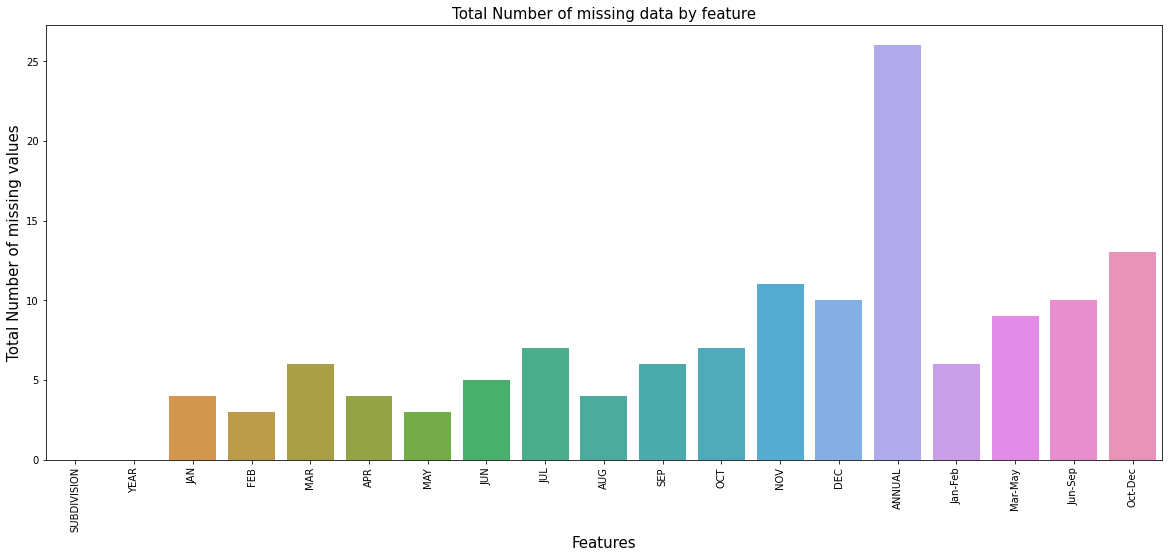

In [50]:
missing_values = rainfall_india.isnull().sum()
f, ax = plt.subplots(figsize=(20, 8))
plt.xticks(rotation='90')
sns.barplot(x=missing_values.index, y=missing_values)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Total Number of missing values', fontsize=15)
plt.title('Total Number of missing data by feature', fontsize=15)

The above output shows us the no. of missing values in each columns. As we know we have total of 4116 records, and from above results we can see that we have no more than 15 records missing except for the annual rainfall which is less than 0.4% of the total data. For annual rainfall for each specific year, we have 26 missing values which is 0.6% of the total data. This implies that we have sufficient number of data for a good analysis.    

#### Imputing the missing values

In [51]:
from missingpy import MissForest
# Make an instance and perform the imputation
imputer = MissForest()
rain = rainfall_india.drop(['SUBDIVISION','YEAR'],axis =1)
rain = imputer.fit_transform(rain)
rain = pd.DataFrame(rain)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


We will be imputing the missing values in the dataframe with the help of *MissForest()* class of *missingpy* library. *MissForest* is used to impute missing values particularly in the case 

#### Sanity check for missing values

In [52]:
rain['YEAR'] = rainfall_india['YEAR']
rain['SUBDIVISION'] = rainfall_india['SUBDIVISION']
cols = list(rain)
cols = [cols[-1]] + [cols[-2]] + cols[:-2]
rain = rain[cols]
rain.columns = rainfall_india.columns
print('\nMissing values    :',rain.isnull().values.sum())


Missing values    : 0


Above output of the code proves that now we don't have any missing value in our data.

#### Summary of the data

In [53]:
rain.drop(['SUBDIVISION','YEAR'],axis =1).describe().T

,count,mean,std,min,25%,50%,75%,max
JAN,4116.0,18.958290,33.572869,0.0,0.600,6.00,22.200,583.7
FEB,4116.0,21.809116,35.899156,0.0,0.600,6.70,26.800,403.5
MAR,4116.0,27.408899,46.973787,0.0,1.000,7.90,31.400,605.6
APR,4116.0,43.148545,67.822660,0.0,3.000,15.70,49.950,595.1
MAY,4116.0,85.753640,123.190667,0.0,8.600,36.70,97.225,1168.6
JUN,4116.0,230.327346,234.634876,0.4,70.475,138.90,305.225,1609.9
JUL,4116.0,347.351264,269.389022,0.0,175.900,284.90,418.325,2362.8
AUG,4116.0,290.318423,188.688269,0.0,156.150,259.50,377.800,1664.6
SEP,4116.0,197.430244,135.348666,0.1,100.600,174.10,265.800,1222.0
OCT,4116.0,95.508196,99.437068,0.0,14.600,65.75,148.300,948.3


From the above summary statistics, we can conclude following:
* As the count of every column is now 4116, that implies there are no missing values.
* From the min column, we can see many 0.0 values, which implies that there were no rain in that month in somw year.
* Mean column shows us that maximum rain in India fall between June to September. 

#### Amount of Rainfall in various states of India 

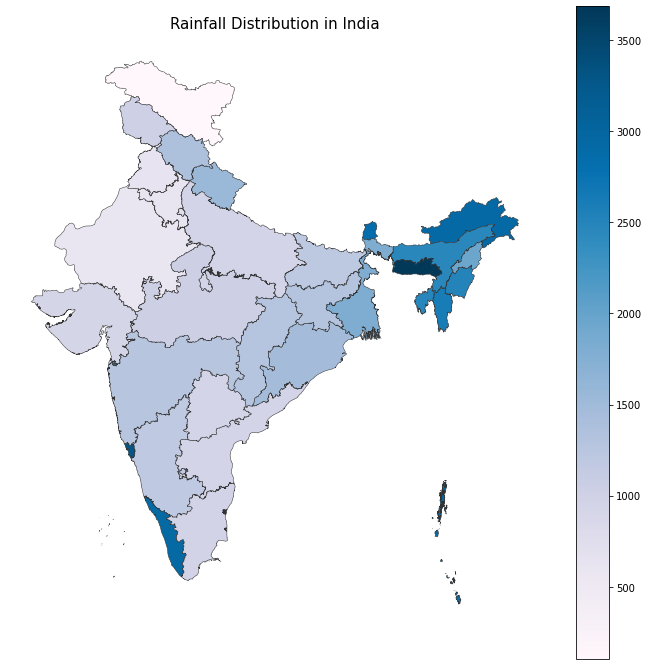

In [58]:
import geopandas as gpd
import matplotlib.pyplot as plt 

shp_gdf = gpd.read_file('/Users/shrey/Desktop/P4DS/maps-master/States/Admin2.shp')
states = pd.read_csv('output8.csv')

merged = shp_gdf.set_index('ST_NM').join(states.set_index('STATE/UT'))
merged.head()

fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Rainfall Distribution in India',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='ANNUAL', cmap='PuBu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
#RdYlGn

#### Line plot for Annual Rainfall of India from Year 1901 to 2015

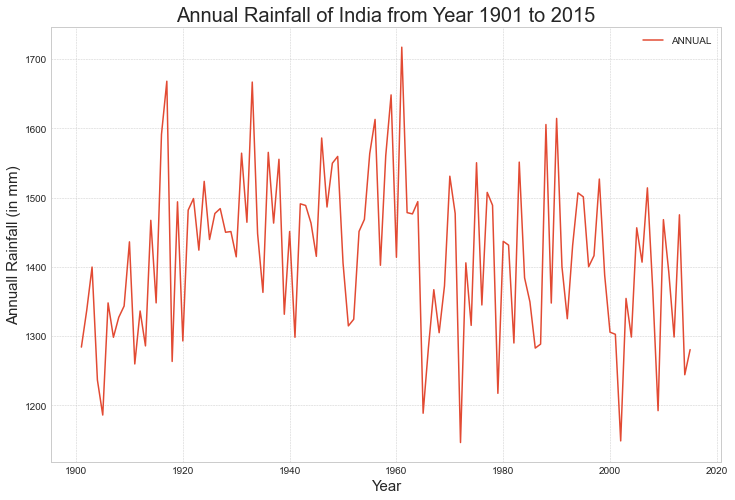

In [146]:
from matplotlib import pyplot
series = rain[["YEAR", 'ANNUAL']].groupby("YEAR").mean()
series.plot(figsize=(12,8))
pyplot.xlabel('Year',fontsize=15)
pyplot.ylabel('Annuall Rainfall (in mm)',fontsize=15)
pyplot.title('Annual Rainfall of India from Year 1901 to 2015',fontsize=20)
ax.tick_params(labelsize=15)
pyplot.grid(which='major', linestyle = '--', linewidth = 0.5)
pyplot.show()

Above plot shows us the annual rainfall from 1901 to 2015. From the graph we can see that the maximum rainfall happened was in year 1961. 

#### Boxplot for Annual Rainfall in Sub-divisions of India

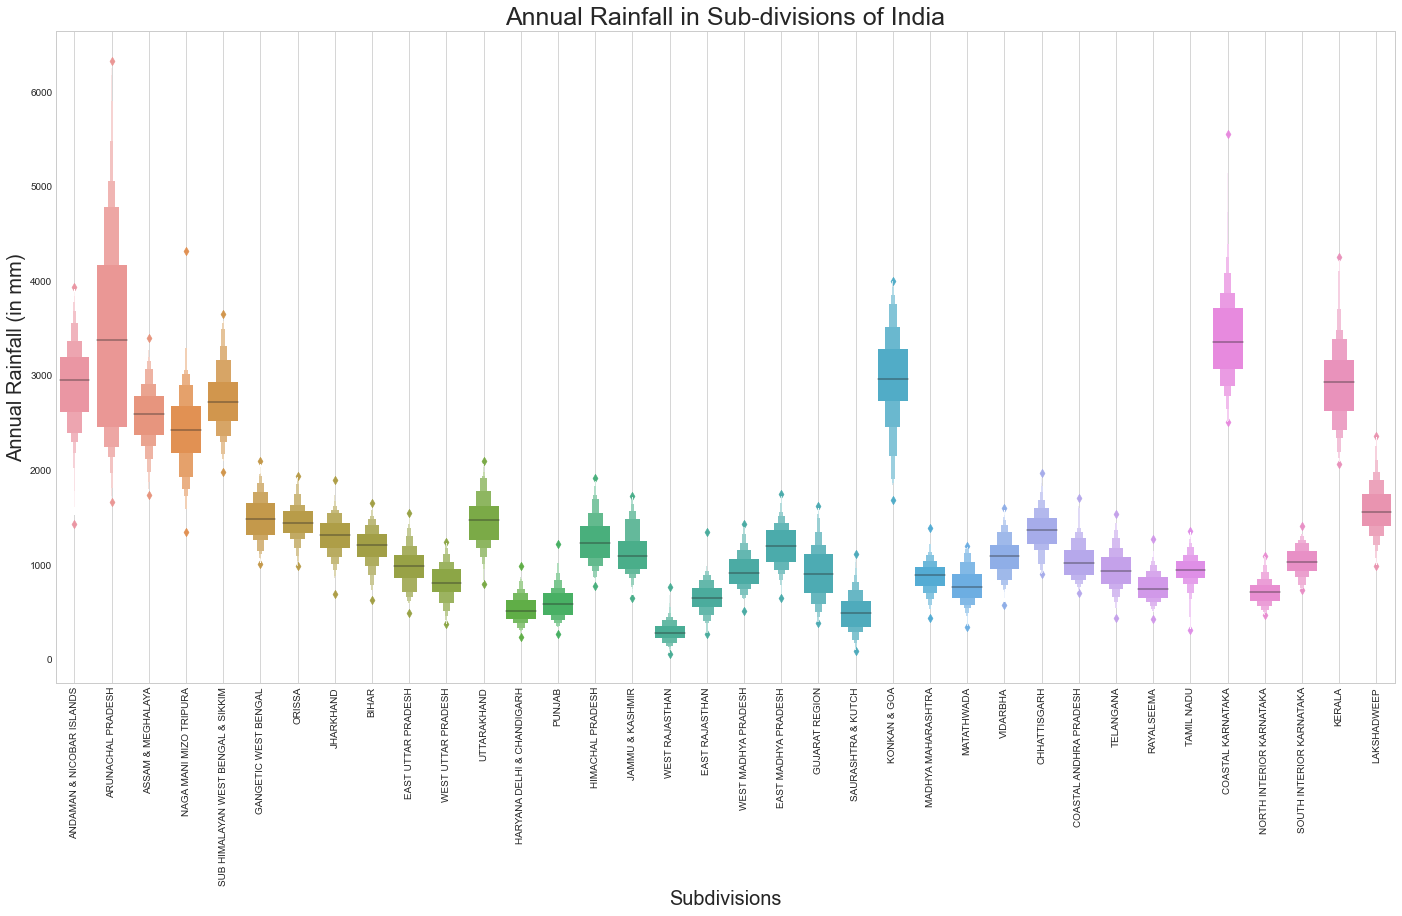

In [147]:

#plt.subplot(2,1,1)
#colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
#plt.figure(figsize=(20,10))
#sns.boxenplot(data = features,palette = colours)
sns.boxenplot(x="SUBDIVISION", y="ANNUAL", data=rain)
#ax.set_xlabel('Subdivision',fontsize=30)
#ax.set_ylabel('Annual Rainfall (in mm)',fontsize=30)
plt.title('Annual Rainfall in Sub-divisions of India',fontsize=25)
plt.xlabel('Subdivisions',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (24,12)
plt.grid()
plt.ioff()
plt.show()



From the above boxplot, we can see that in Arunachal Pradesh, annual rainfall variation is very high, which means some years the rainfall will be very much and other times the rain will be comparatively less. 

#### Barplot for Annual Rainfall in Sub-divisions of India

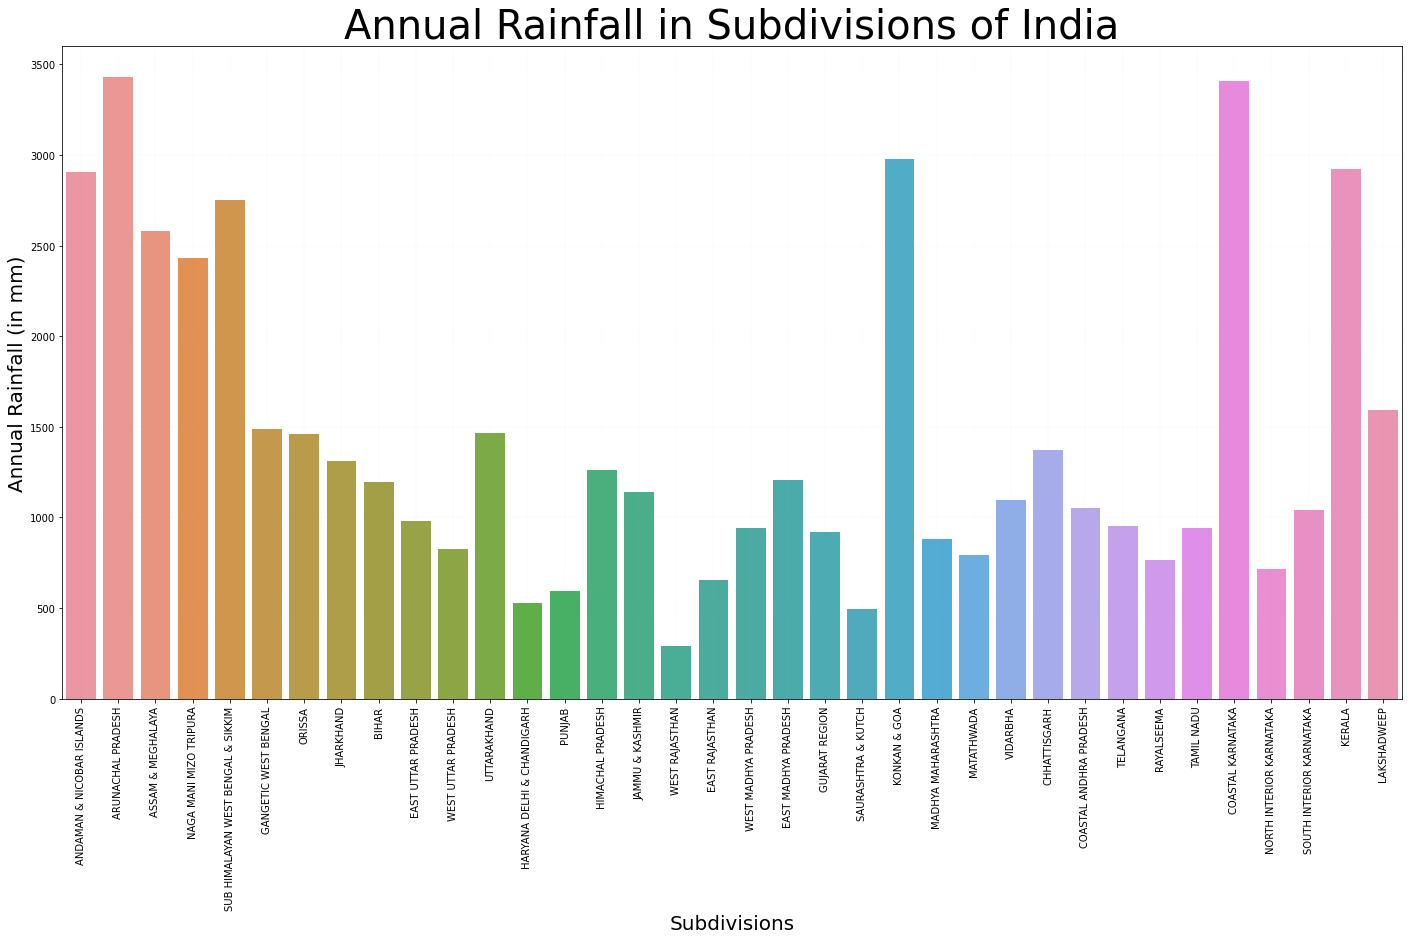

In [100]:
ax = sns.barplot( x="SUBDIVISION", y="ANNUAL",data=rain,ci=None)
plt.title('Annual Rainfall in Subdivisions of India',fontsize=40)
plt.xlabel('Subdivisions',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (24,12)
plt.grid(linewidth=0.05)
plt.ioff()
plt.show()

From the above barplot we can see that the top - 5 divisions with highest rainfall are :
* Arunachal Pradesh
* Coastal Karnataka
* Konkan & Goa
* Andaman & Nicobar Islands
* Kerela

#### Heatmap showing the rainfall monthly and seasonally from 1901-2015 

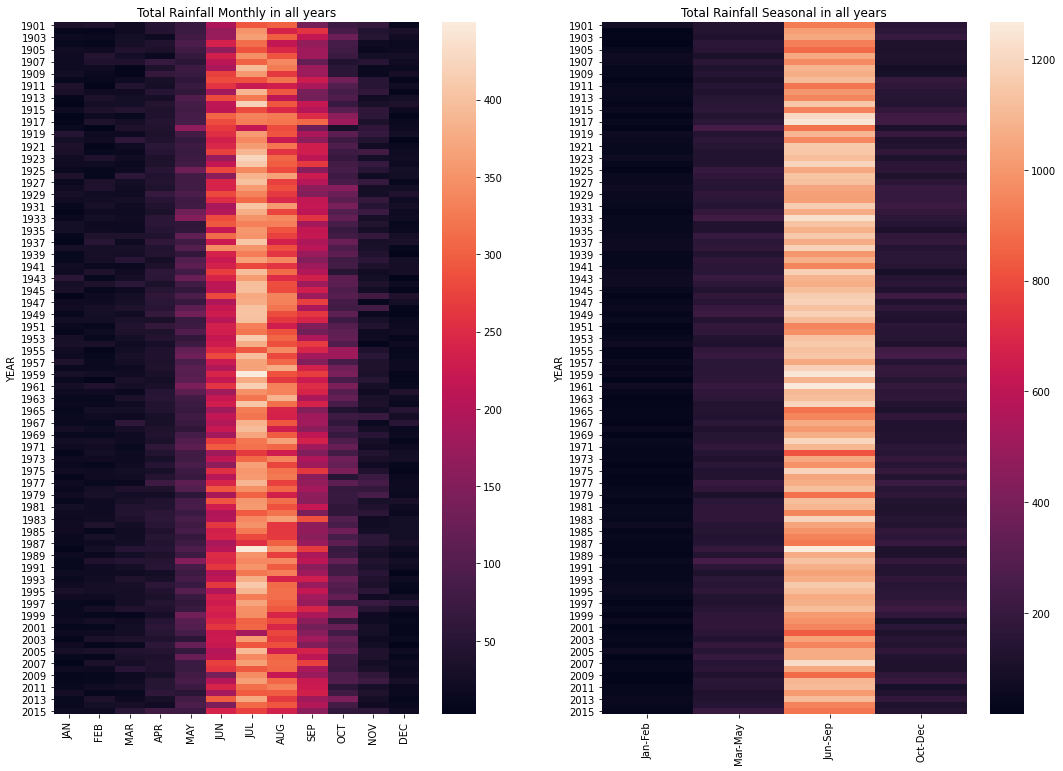

In [102]:
v1 = rain[['SUBDIVISION','YEAR', 'JAN','FEB','MAR','APR','MAY',
           'JUN','JUL','AUG','SEP','OCT','NOV','DEC']].groupby('YEAR').mean()

v2 = rain[['SUBDIVISION','YEAR', 'Jan-Feb', 'Mar-May',
           'Jun-Sep', 'Oct-Dec']].groupby('YEAR').mean()

fig = plt.figure(figsize=(18, 28))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=90)
ax1 = sns.heatmap(v1[['JAN','FEB','MAR','APR','MAY','JUN','JUL',
                      'AUG','SEP','OCT','NOV','DEC']])
ax1 = plt.title('Total Rainfall Monthly in all years')

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=90)
ax2 = sns.heatmap(v2[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']])
ax2 = plt.title('Total Rainfall Seasonal in all years')

The above output plots indicate the quantity of rainfall in millimetres for each month and season in the corresponding year. As a result of the preceding plots, we can infer that in India, July has tremendous rainfall, while August also has a good amount of rainfall, June and September have an average amount of rainfall, May and October have less rainfall, and the remaining months have far less rainfall.

#### Lag plot

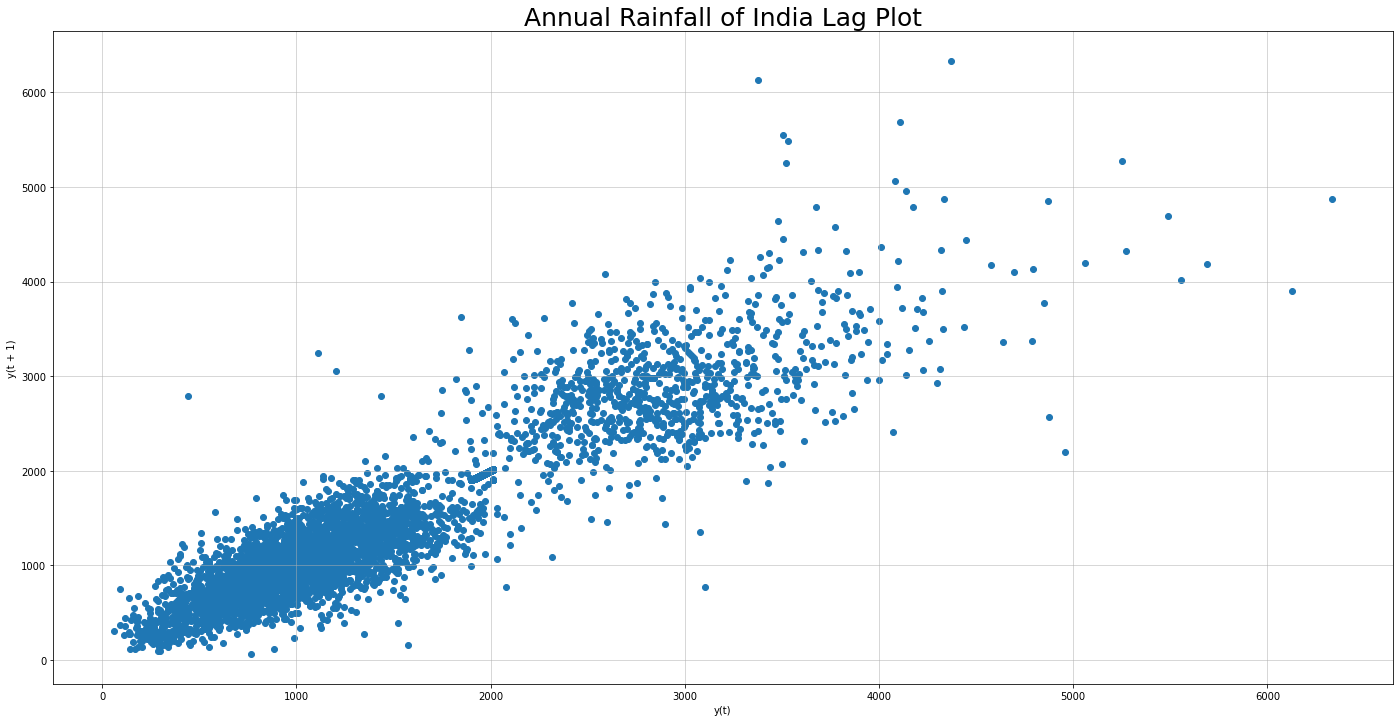

In [105]:
series = rain[['YEAR', 'ANNUAL']]
from pandas.plotting import lag_plot
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
lag_plot(series)
#pyplot.xlabel('Year',fontsize=20)
#pyplot.ylabel('Annuall Rainfall (in mm)',fontsize=20)
pyplot.title('Annual Rainfall of India Lag Plot',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid(linewidth=0.5)
pyplot.show()

In [ ]:
Explanation pending


#### Analysis of Monthly Rainfall in India from 1901 to 2015 through different plots

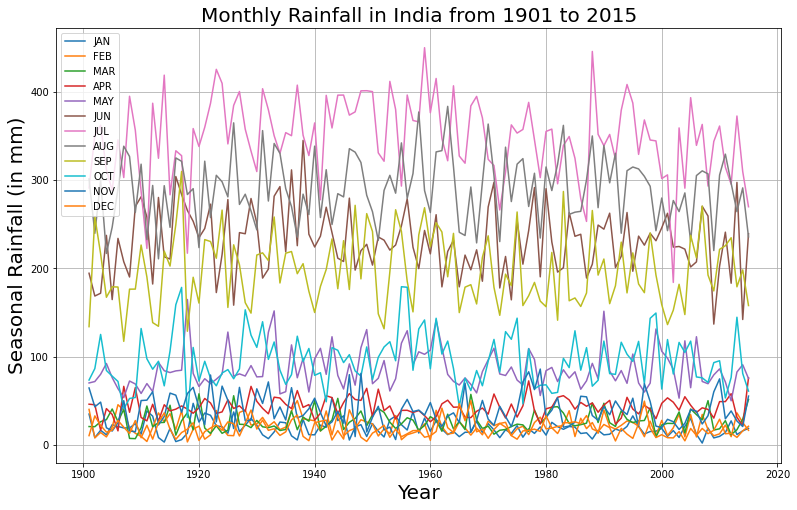

In [118]:
rain.groupby("YEAR").mean()[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].plot(figsize=(13,8));
plt.xlabel('Year',fontsize=20)
plt.ylabel('Seasonal Rainfall (in mm)',fontsize=20)
plt.title('Monthly Rainfall in India from 1901 to 2015',fontsize=20)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

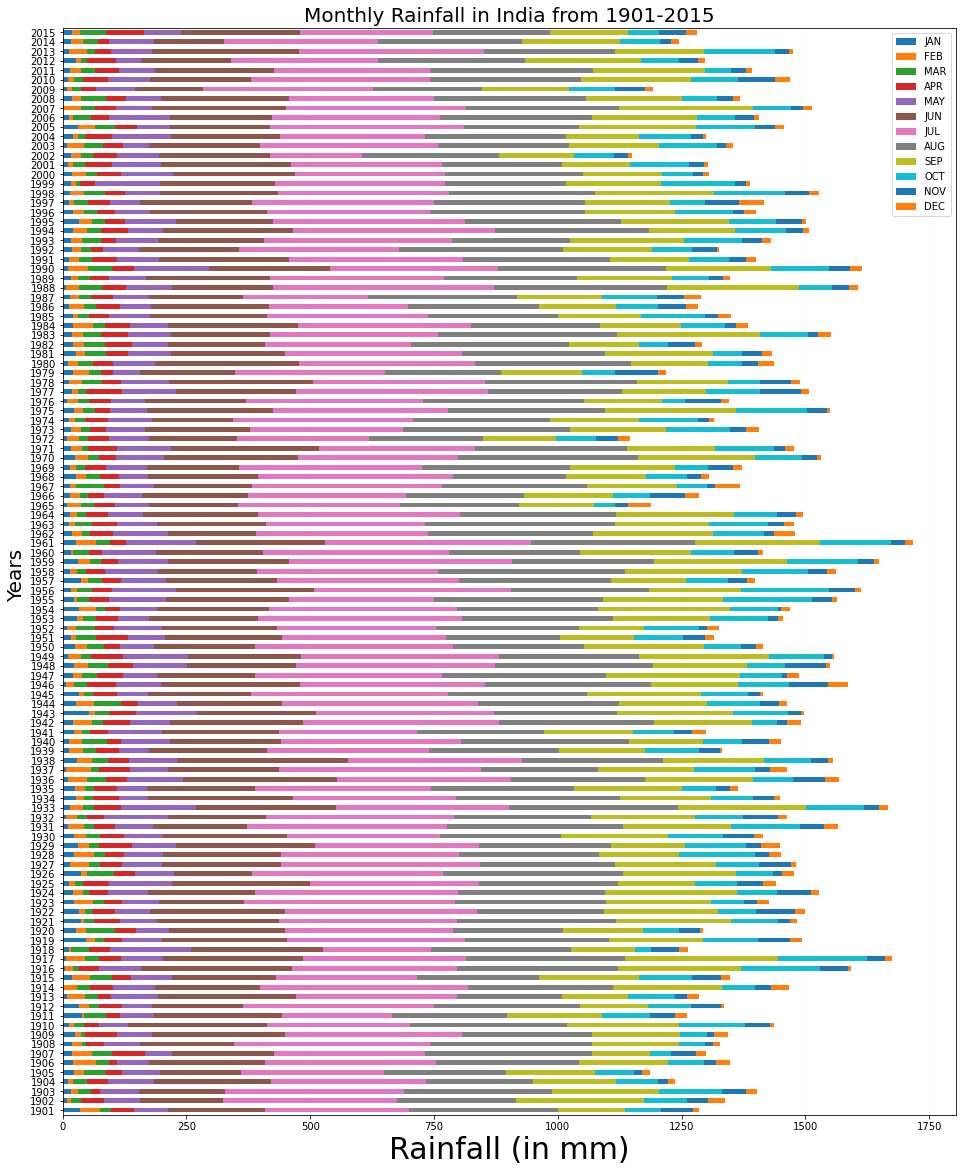

In [115]:
rain[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").mean().plot.barh(stacked=True,figsize=(16,20));
plt.xlabel('Rainfall (in mm)',fontsize=30)
plt.ylabel('Years ',fontsize=20)
plt.title('Monthly Rainfall in India from 1901-2015',fontsize=20)
ax.tick_params(labelsize=15)
plt.grid(linewidth=0.01)
plt.ioff()

#### Analysis of Seasonal Rainfall in India from 1901 to 2015 through different plots

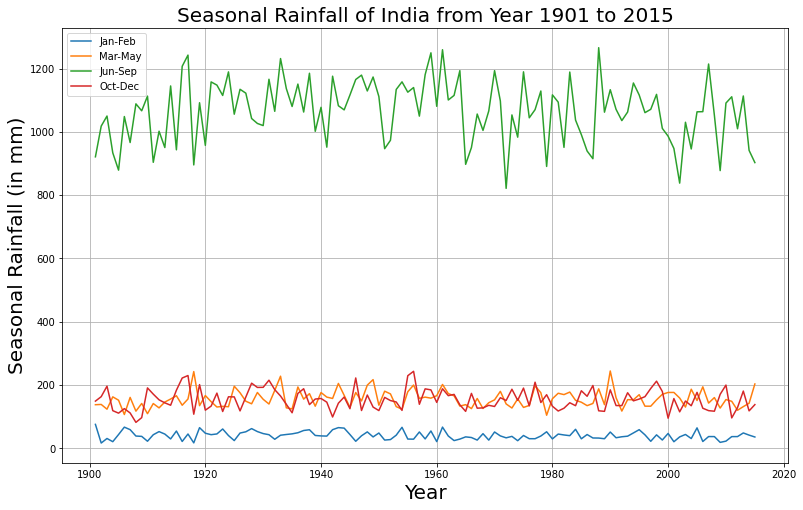

In [116]:
rain.groupby("YEAR").mean()[['Jan-Feb','Mar-May','Jun-Sep', 'Oct-Dec']].plot(figsize=(13,8));
plt.xlabel('Year',fontsize=20)
plt.ylabel('Seasonal Rainfall (in mm)',fontsize=20)
plt.title('Seasonal Rainfall of India from Year 1901 to 2015',fontsize=20)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

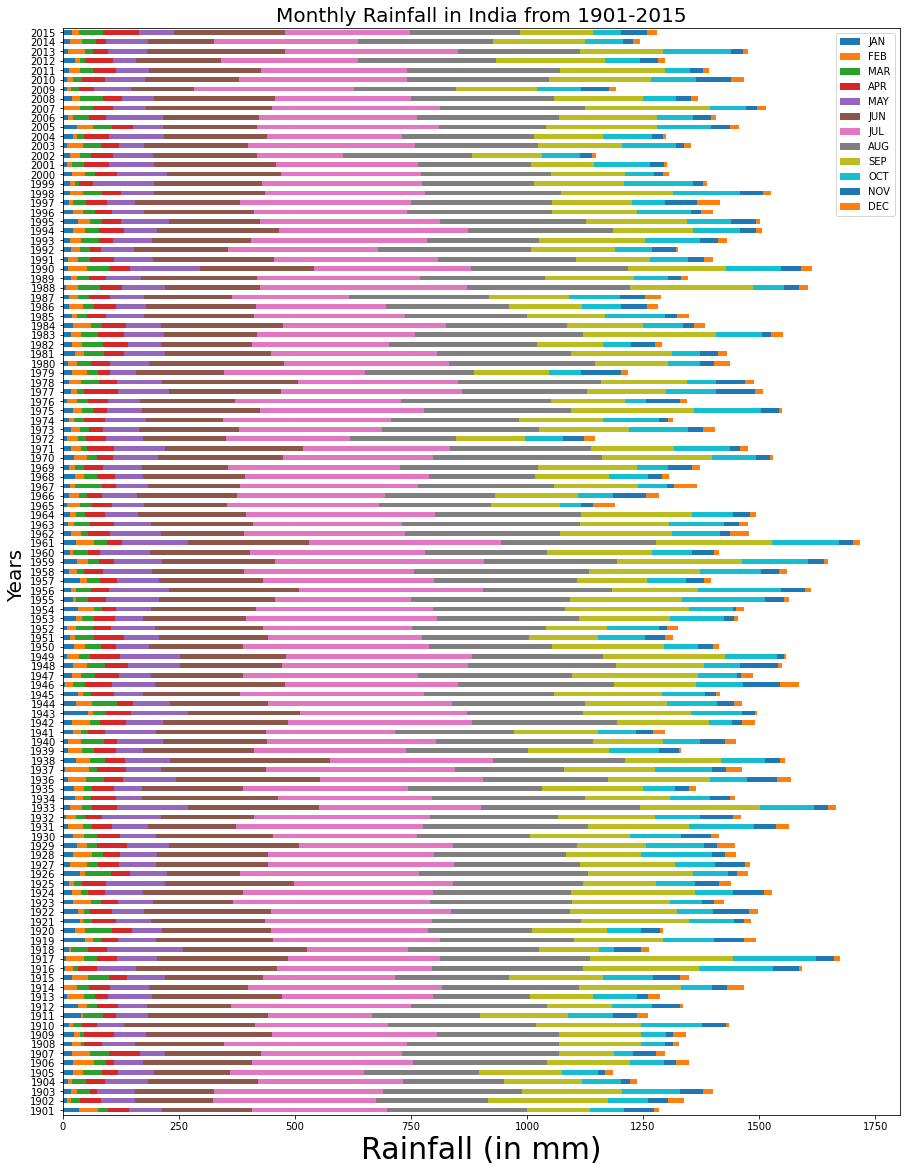

In [117]:
rain[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").mean().plot.barh(stacked=True,figsize=(15,20));
plt.xlabel('Rainfall (in mm)',fontsize=30)
plt.ylabel('Years ',fontsize=20)
plt.title('Monthly Rainfall in India from 1901-2015',fontsize=20)
ax.tick_params(labelsize=15)
plt.grid(linewidth=0.01)
plt.ioff()

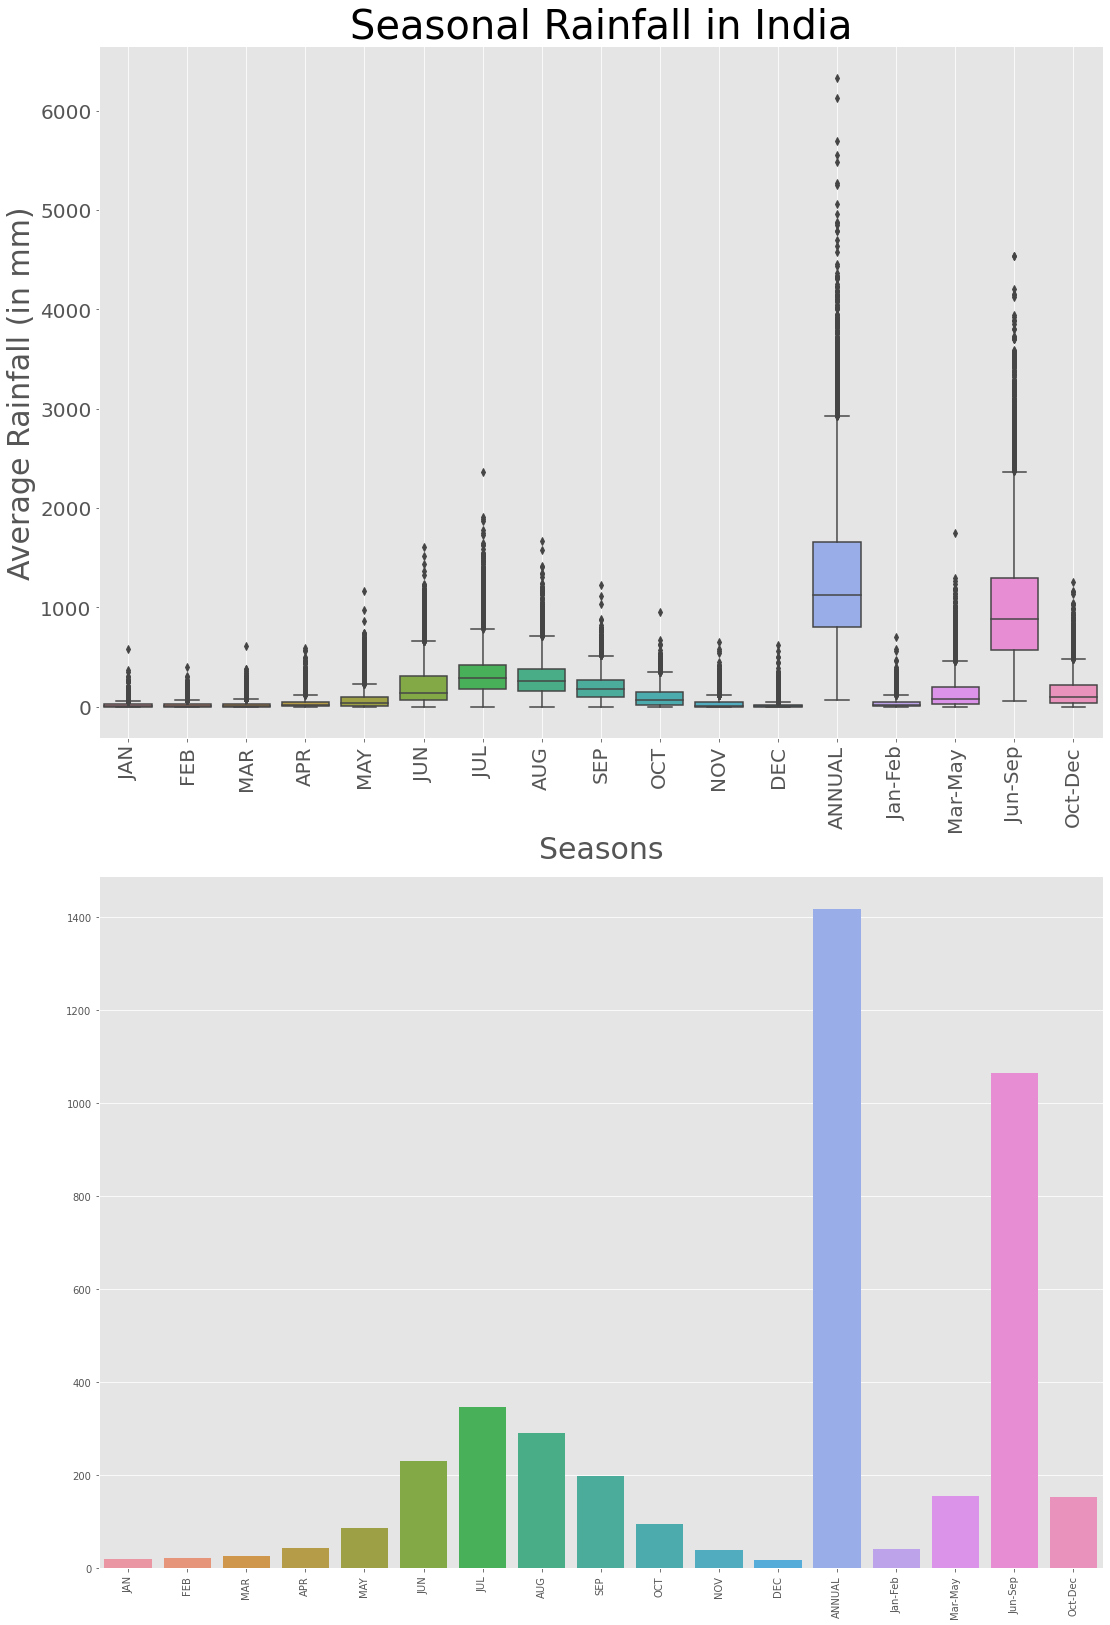

In [123]:
plt.style.use('ggplot')
rain_wo_year = rain.drop(['YEAR'],axis =1)
fig = plt.figure(figsize=(18, 28))
ax = plt.subplot(2,1,1)
ax = plt.xticks(rotation=90)
ax = sns.boxplot(data=rain_wo_year)
ax.set_xlabel('Seasons',fontsize=30)
ax.set_ylabel('Average Rainfall (in mm)',fontsize=30)
plt.title('Seasonal Rainfall in India',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)
ax.tick_params(axis='y',labelsize=20,rotation=0)
plt.grid()
plt.ioff()


ax = plt.subplot(2,1,2)
ax = plt.xticks(rotation=90)
ax = sns.barplot( data=rain_wo_year,ci=None)

Explanation pending


#### Analysis of Monthly Rainfall in Subdivisions of India through different plots

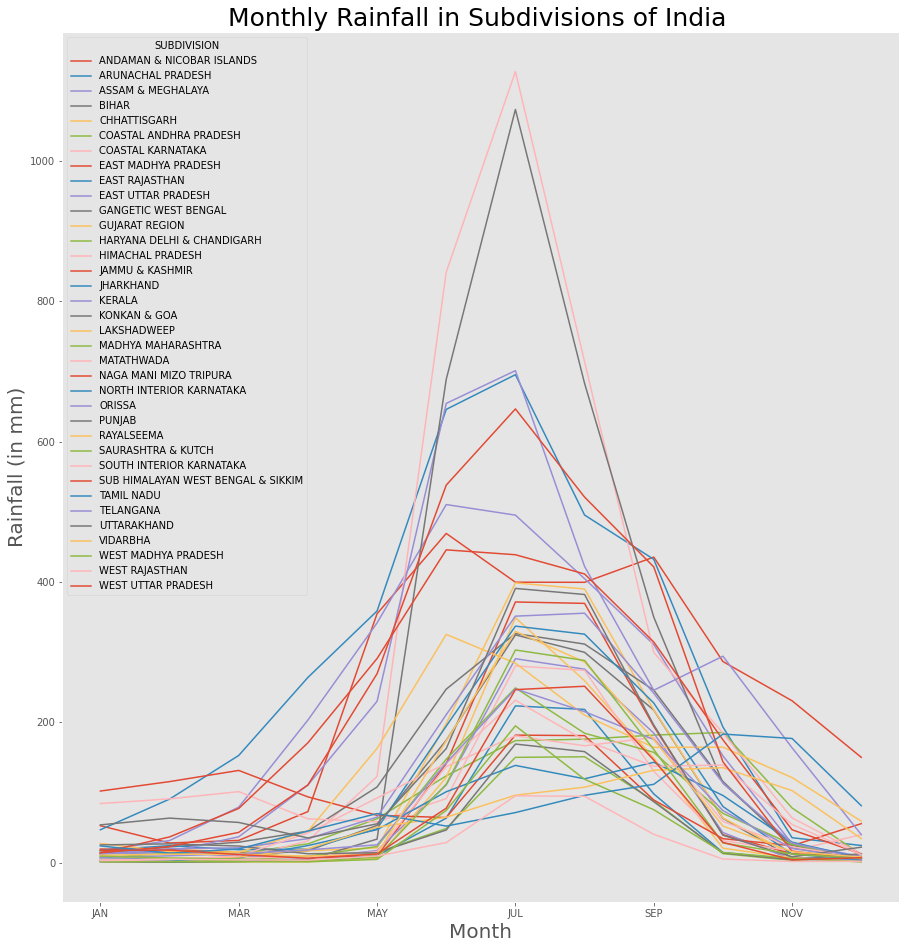

In [127]:
rain.groupby("SUBDIVISION").mean()[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].T.plot(figsize=(15,16));
plt.xlabel('Month',fontsize=20)
plt.ylabel('Rainfall (in mm)',fontsize=20)
plt.title('Monthly Rainfall in Subdivisions of India ',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

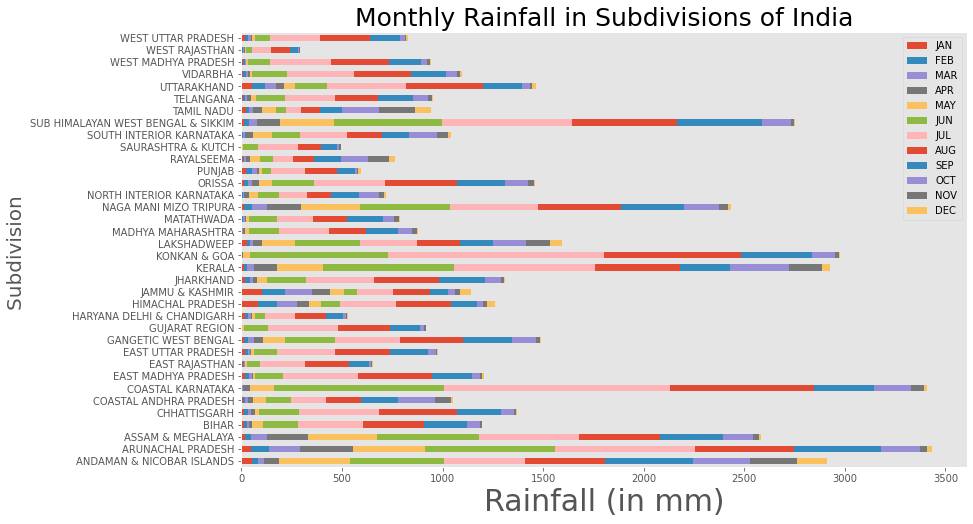

In [128]:
rain[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(13,8));
plt.xlabel('Rainfall (in mm)',fontsize=30)
plt.ylabel('Subdivision ',fontsize=20)
plt.title('Monthly Rainfall in Subdivisions of India',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

#### Analysis of Seasonal Rainfall in Subdivisions of India

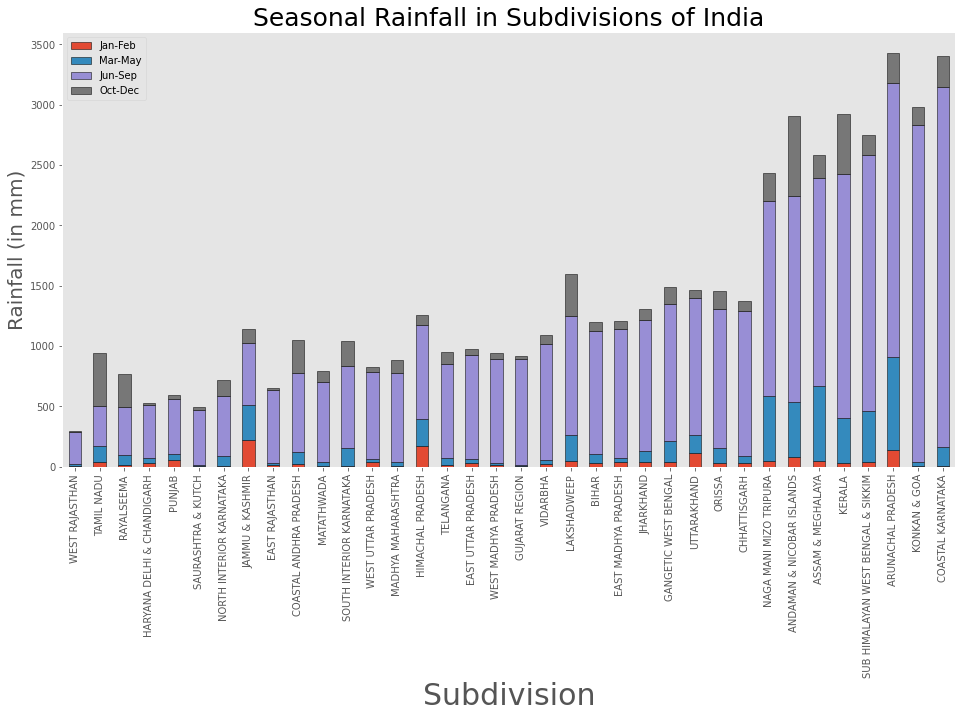

In [129]:
rain[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").mean().sort_values('Jun-Sep').plot.bar(width=0.5,edgecolor='k',align='center',stacked=True,figsize=(16,8));
plt.xlabel('Subdivision',fontsize=30)
plt.ylabel('Rainfall (in mm)',fontsize=20)
plt.title('Seasonal Rainfall in Subdivisions of India',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

####  Rainfall Distribution of Subdivision over the months


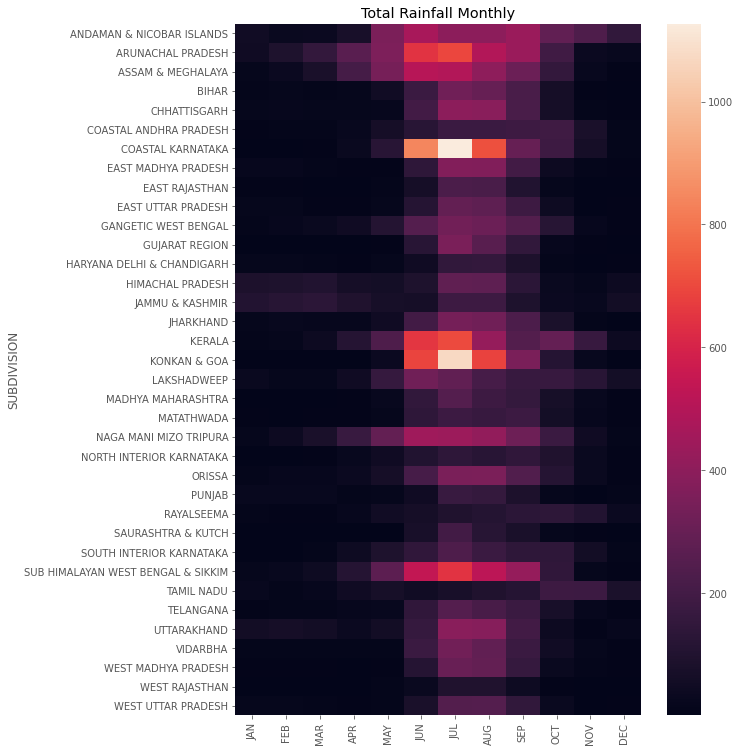

In [133]:
total_rainfall_in_states = rain.groupby(['SUBDIVISION']).mean()
total_rainfall_in_states['SUBDIVISION'] = total_rainfall_in_states.index


plt.style.use('ggplot')
index = total_rainfall_in_states.index
fig = plt.figure(figsize=(20, 28))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=90)
ax1 = sns.heatmap(total_rainfall_in_states[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']])
ax1 = plt.title('Total Rainfall Monthly')



####  Rainfall Distribution of Subdivision over the seasons


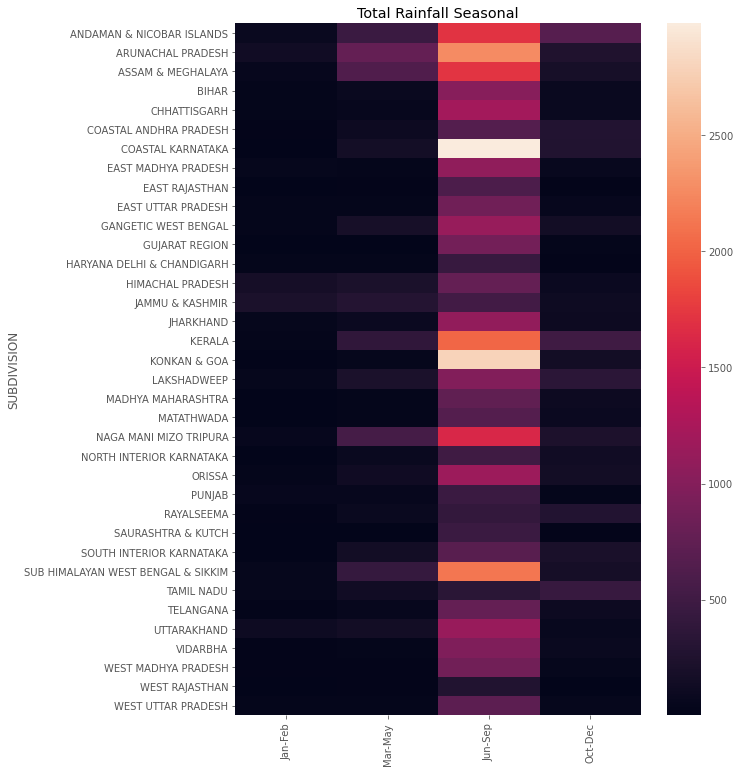

In [136]:
plt.style.use('ggplot')
index = total_rainfall_in_states.index
fig = plt.figure(figsize=(20, 28))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=90)
ax2 = sns.heatmap(total_rainfall_in_states[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']])
ax2 = plt.title('Total Rainfall Seasonal')

In [151]:
rain.reset_index()

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


AttributeError: 'AxesSubplot' object has no attribute 'rowNum'

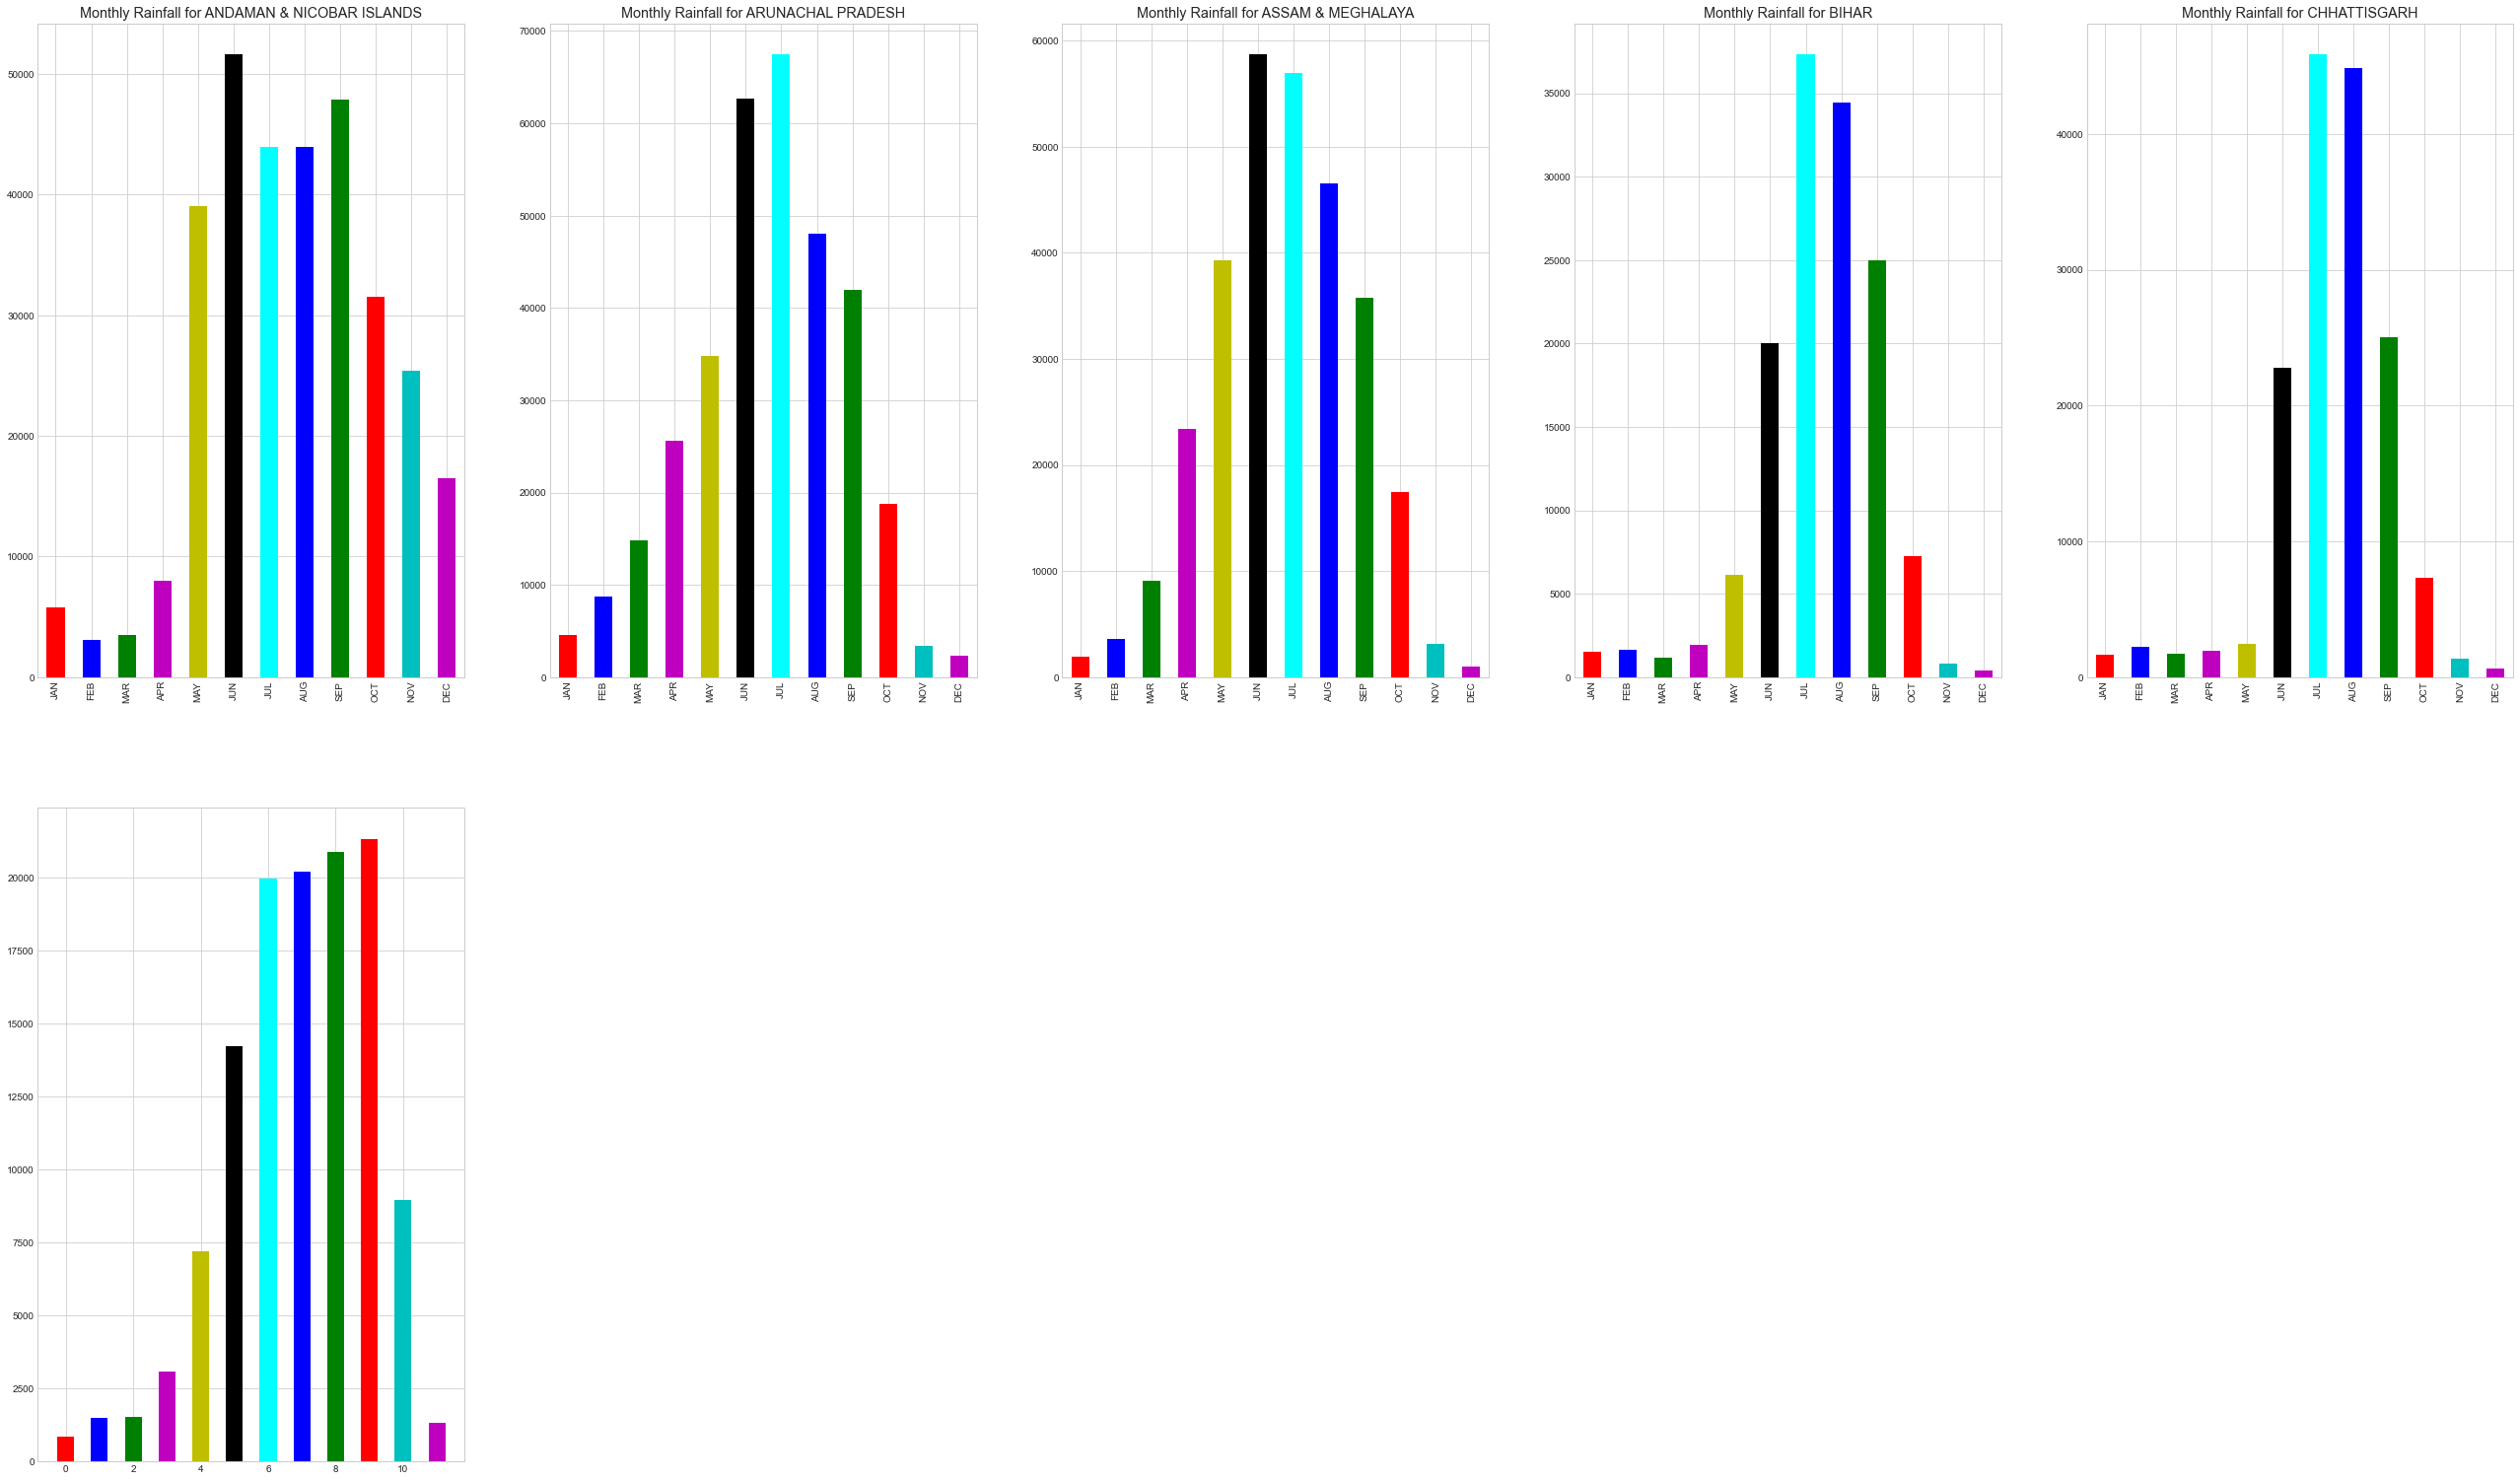

In [152]:
total_rainfall_in_states = rain.groupby(['SUBDIVISION']).sum()
total_rainfall_in_states
total_rainfall_in_states['SUBDIVISION'] = total_rainfall_in_states.index
total_rainfall_in_states.head()

total_rainfall_in_states = total_rainfall_in_states.drop('SUBDIVISION', axis=1)
total_rainfall_in_states = total_rainfall_in_states.drop('YEAR', axis=1)
total_rainfall_in_states = total_rainfall_in_states.T
total_rainfall_in_states.head()

monthly_total_rainfall = total_rainfall_in_states.head(12)
seasonal_total_rainfall = total_rainfall_in_states.tail(4)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(45,100))
monthly_total_rainfall['color'] = ['red','blue','green','m','y','k','cyan','b','g','r','c','m']
for i in range(35):
    plt.subplot(7, 5, i+1)
    t = monthly_total_rainfall[monthly_total_rainfall.columns[i]].plot.bar(color = monthly_total_rainfall['color'])
    t.set_title("Monthly Rainfall for " + str(monthly_total_rainfall.columns[i]))
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'rowNum'

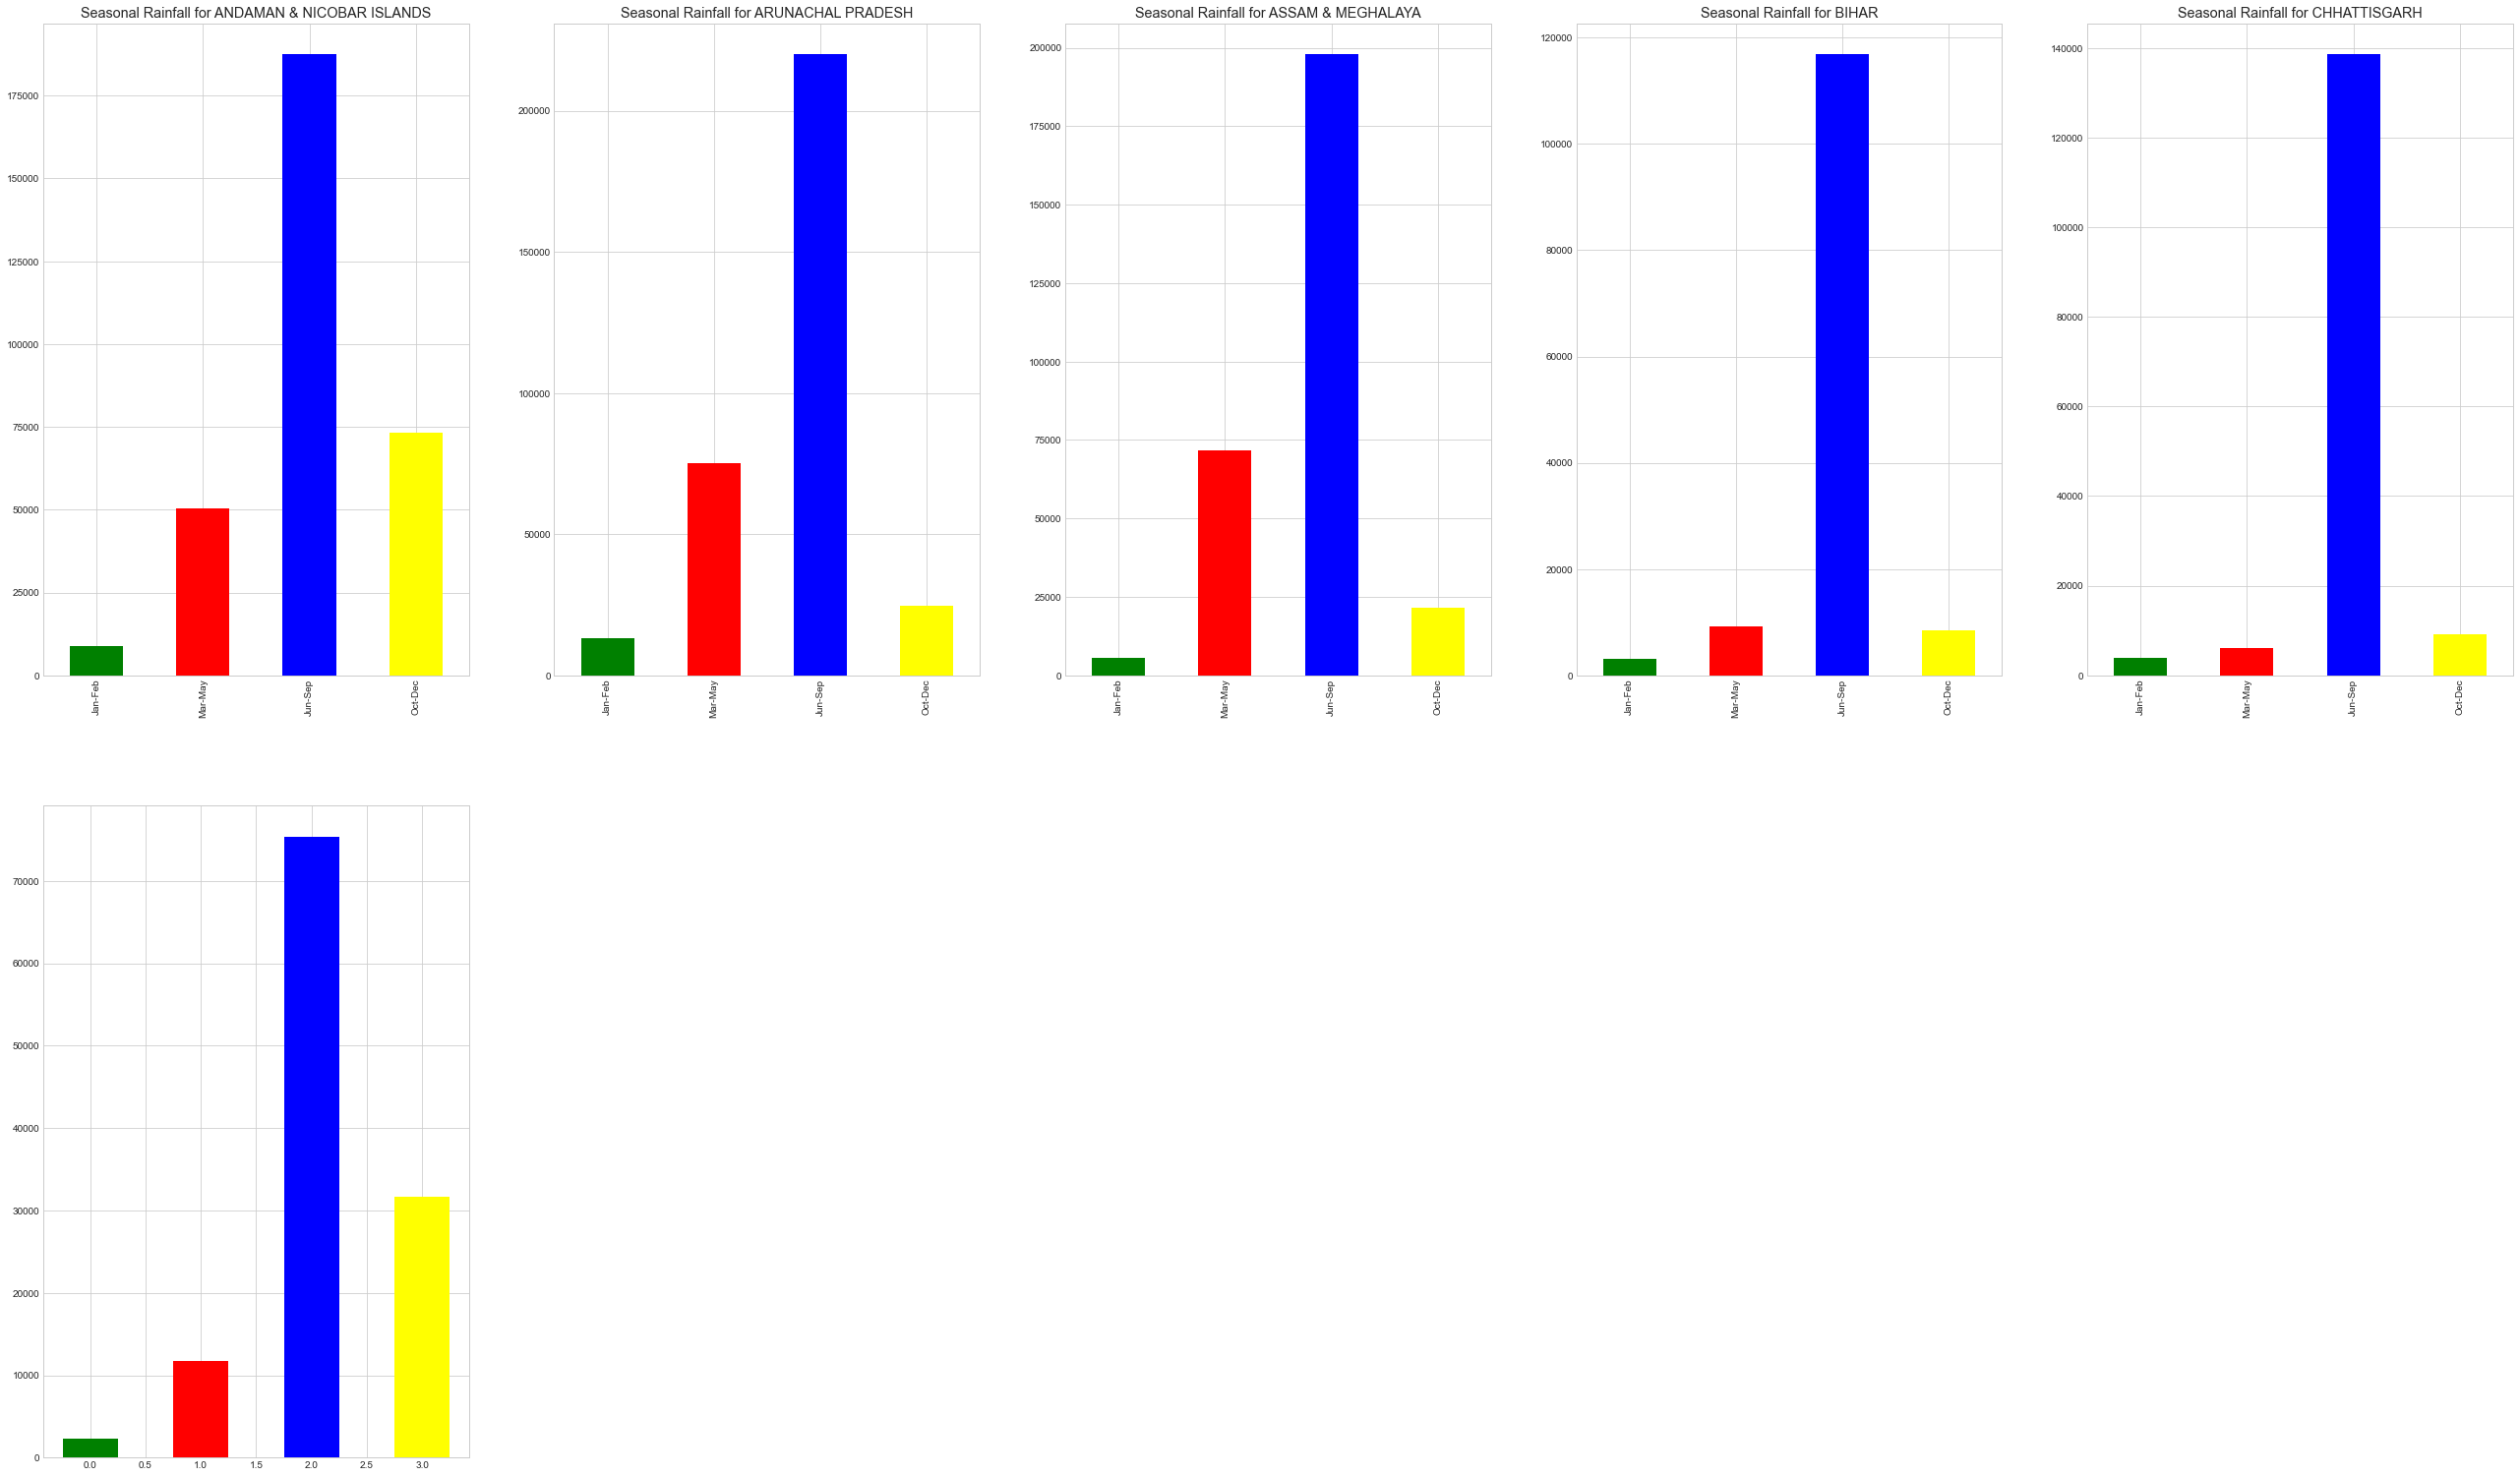

In [142]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(45,100))
seasonal_total_rainfall['color'] = ['green','red','blue','yellow']
for i in range(35):
    plt.subplot(7, 5, i+1)
    t = seasonal_total_rainfall[seasonal_total_rainfall.columns[i]].plot.bar(color=seasonal_total_rainfall['color'] )
    t.set_title("Seasonal Rainfall for " +str(seasonal_total_rainfall.columns[i]))
plt.show()

# Project Outcome (10 + 10 marks)

_This section should describe the outcome of the project by means of both explanation of the results and by graphical visualisation in the form of graphs, charts or or other kinds of diagram_

_The section should begin with a general overview of the results and then have a section for each of the project objectives. For each of these objectives an explanation of more specific results relating to that objective shoud be given, followed by a section presenting some visualisation of the results obtained. (In the case where
the project had just one objective, you should still have a section describing
the results from a general perspective followed by a section that focuses on
the particular objective.)_

_The marks for this section will be divided into 10 marks for Explanation
and 10 marks for Visualisation. These marks will be awarded for the Project Outcome
section as a whole, not for each objective individually. Hence, you do not
have to pay equal attention to each. However, you are expected to have a
some explanation and visualisation for each. It is suggested you have
200-400 words explanation for each objective._

## Overview of Results
_Give a general overview of the results (around 200 words)._

## Objective 1

### Explanation of Results

_200-400 words_

### Visualisation
_The following bar chart gives a vivid representation of the distribution
of fridge magnet types, in which the dominance of 'meme' type magnets
is dramatically illustrated._

<AxesSubplot:>

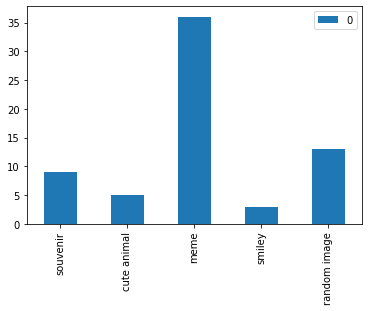

In [52]:
df.plot(kind='bar')

## Objective 2 _(if present)_
### Explanation of Results

200-400 Words

### Visualisation

## Objective 3 _(if present)_
### Explanation of Results

200-400 Words

### Visualisation

# Conclusion (5 marks)

_Your concluding section should be around 200-400 words. It is recommended
that you divide it into the following sections.__

### Acheivements
_As we had expected, the most popular fridge magnets were of the 'meme' kind.
We were surprised that 'smiley' fridge magnets were less common than expected.
We conjecture that this is because, although they are apparently very popular,
few fridges display more than one smiley. However, 'meme' based magnets can
be found in large numbers, even on quite small fridges._

### Limitations

_The project was limited to a small number of fridge magents, which may not be
typical of fridges found in the global fridge magnet ecosystem._

### Future Work

_In future work we would like to obtain more diverse data and study fridge magnets 
beyond the limited confines of student accomodation. We hypothesise that there
could be a link between fridge magnet types and social class and/or educational
achievement._

# Grading

_Feedback and marks will be given here._

### Feedback

### Marks

In [56]:
DATA   = 10
AIMS   =  5
DESIGN = 5

CODE = 15

OUTCOME_EXPLANATION   = 10
OUTCOME_VISUALISATION = 10

CONCLUSION = 5

TOTAL = ( DATA + AIMS + DESIGN + CODE 
          + OUTCOME_VISUALISATION + OUTCOME_VISUALISATION
          + CONCLUSION )
TOTAL

60